In [6]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
# Upload the Excel file to Colab
uploaded = files.upload()

# Read the Excel file using pandas
df = pd.read_excel('AMZN.xlsx', sheet_name='AMZN')
print(df.head())

Saving AMZN.xlsx to AMZN (1).xlsx
        Date      Open      High       Low     Close  Adj Close    Volume
0 1997-05-15  2.437500  2.500000  1.927083  1.958333   1.958333  72156000
1 1997-05-16  1.968750  1.979167  1.708333  1.729167   1.729167  14700000
2 1997-05-19  1.760417  1.770833  1.625000  1.708333   1.708333   6106800
3 1997-05-20  1.729167  1.750000  1.635417  1.635417   1.635417   5467200
4 1997-05-21  1.635417  1.645833  1.375000  1.427083   1.427083  18853200


In [7]:
# Convert the 'Date' column to datetime format and set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Filter the data for the last 10 years
df = df.loc['2012-03-24':'2021-03-24'].copy()

# Compute the daily returns and add them as a new column to the DataFrame
df.loc[:, 'Daily Returns'] = df['Close'].pct_change()




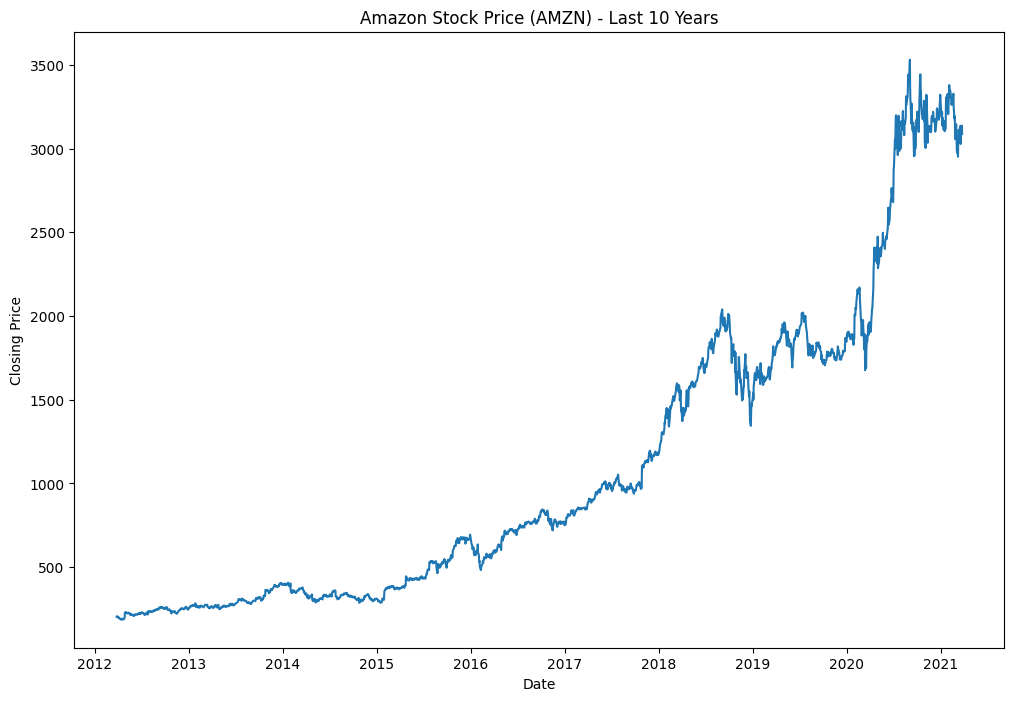

In [8]:
# Plot the closing prices and daily returns
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x=df.index, y='Close')
plt.title('Amazon Stock Price (AMZN) - Last 10 Years')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()


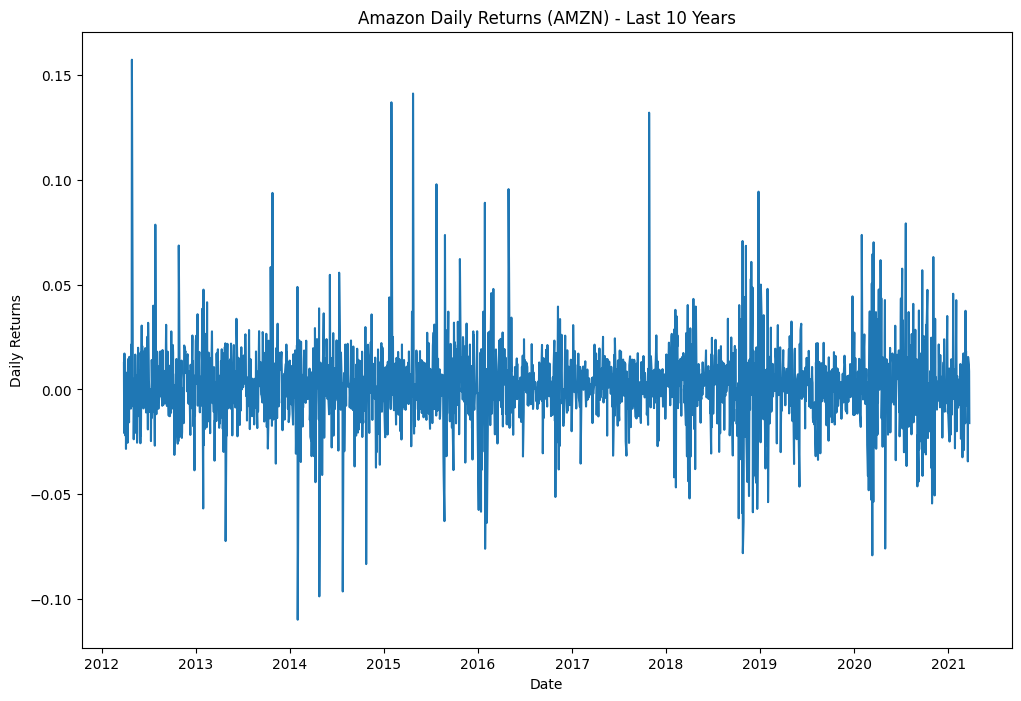

In [9]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x=df.index, y='Daily Returns')
plt.title('Amazon Daily Returns (AMZN) - Last 10 Years')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.show()

In [10]:
# Define the target variable (1 if the daily return is positive, 0 otherwise)
df['Target'] = np.where(df['Daily Returns'] > 0, 1, 0)

# Drop the rows with missing values
df.dropna(inplace=True)

# Split the data into training and testing sets
X = df[['Open', 'High', 'Low', 'Volume']].values
y = df['Target'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Train a logistic regression model on the training set
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [12]:
# Make predictions on the testing set and compute the confusion matrix and AUC score
y_pred_lr = lr_model.predict(X_test)
cm_lr = confusion_matrix(y_test, y_pred_lr)
auc_lr = roc_auc_score(y_test, y_pred_lr)

In [13]:
print('Logistic Regression - Confusion Matrix:')
print(cm_lr)
print('Logistic Regression - AUC Score:', auc_lr)

Logistic Regression - Confusion Matrix:
[[  0 208]
 [  0 245]]
Logistic Regression - AUC Score: 0.5


In [18]:
# Train an XGB classifier model on the training set
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [19]:
# Make predictions on the testing set and compute the confusion matrix and AUC score
y_pred_xgb = xgb_model.predict(X_test)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
auc_xgb = roc_auc_score(y_test, y_pred_xgb)

In [20]:
print('XGB Classifier - Confusion Matrix:')
print(cm_xgb)
print('XGB Classifier - AUC Score:', auc_xgb)

XGB Classifier - Confusion Matrix:
[[127  81]
 [ 92 153]]
XGB Classifier - AUC Score: 0.6175333594976452


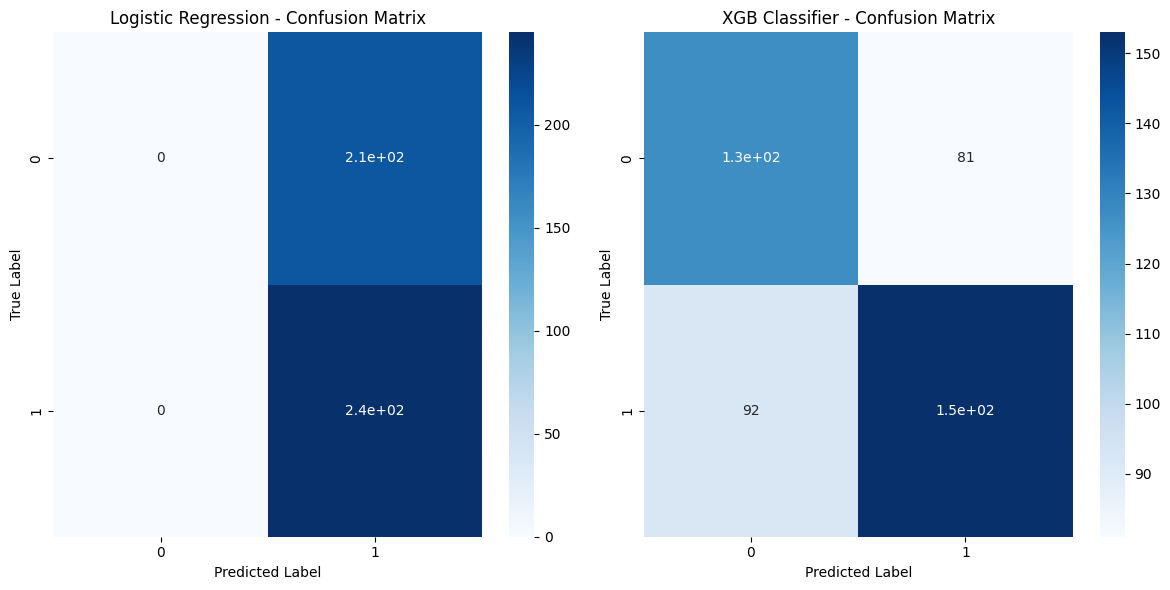

In [21]:
# Plot the confusion matrices for both models
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sns.heatmap(cm_lr, annot=True, cmap='Blues', ax=ax[0])
ax[0].set_title('Logistic Regression - Confusion Matrix')
ax[0].set_xlabel('Predicted Label')
ax[0].set_ylabel('True Label')

sns.heatmap(cm_xgb, annot=True, cmap='Blues', ax=ax[1])
ax[1].set_title('XGB Classifier - Confusion Matrix')
ax[1].set_xlabel('Predicted Label')
ax[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()

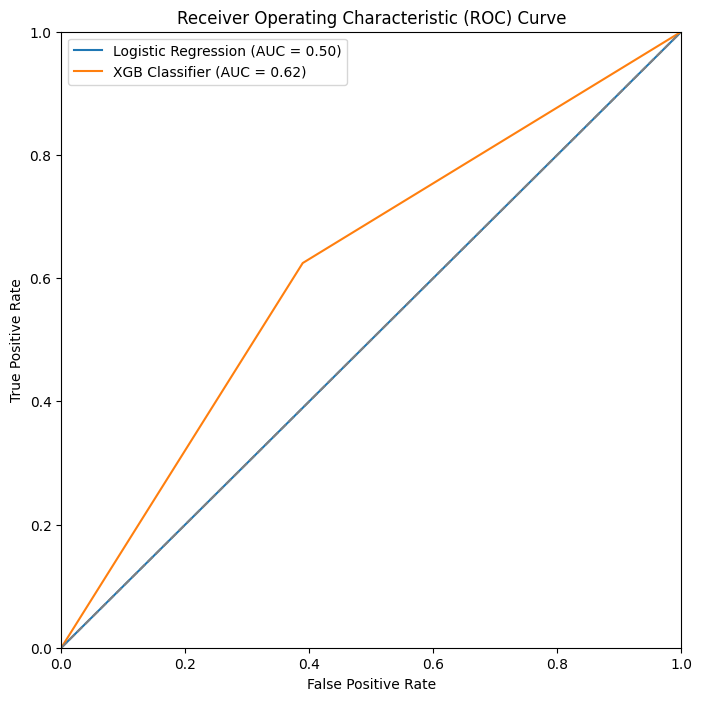

In [22]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
# Plot the ROC curves for both models
plt.figure(figsize=(8, 8))
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_lr)
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_pred_xgb)

plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (AUC = {:.2f})'.format(auc_lr))
plt.plot(fpr_xgb, tpr_xgb, label='XGB Classifier (AUC = {:.2f})'.format(auc_xgb))

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()